<a href="https://colab.research.google.com/github/4juneko/Aiffel_work/blob/master/15_faceLandMark_05242023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Rubric
|평가문항|	상세기준|내 평가|
|--|--|--|
|1. 자기만의 카메라앱 기능 구현을 완수하였다.	|얼굴 영역과 랜드마크를 정확하게 검출하고, 스티커 사진을 합성시키는 데 성공하였다.|O|
|2. 스티커 이미지를 정확한 원본 위치에 반영하였다.	|정확한 좌표계산을 통해 고양이 수염의 위치가 원본 얼굴에 잘 어울리게 출력되었다.|O|
|3. 카메라 스티커앱을 다양한 원본이미지에 적용했을 때의 문제점을 체계적으로 분석하였다.	|얼굴각도, 이미지 밝기, 촬영거리 등 다양한 변수에 따른 영향도를 보고서에 체계적으로 분석하였다.|OX|


In [ ]:
import cv2
import dlib
import os
import matplotlib.pyplot as plt
import numpy as np

print(cv2.__version__)
print(dlib.__version__)

4.5.3
19.22.1


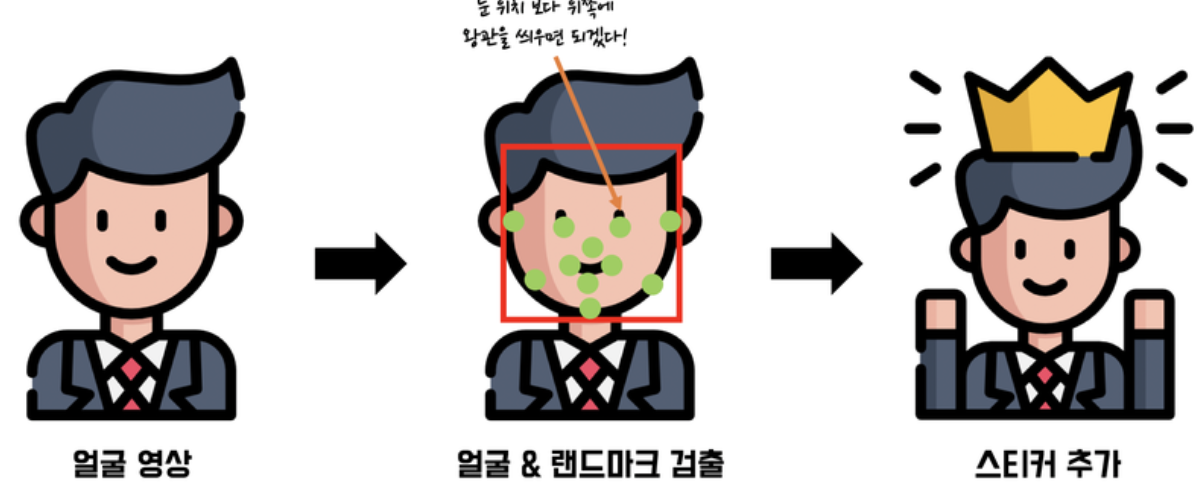

# Attach Sticker

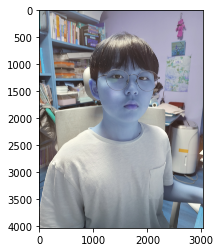

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/13.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다|

plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

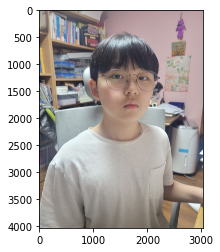

In [ ]:
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [ ]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(1124, 997) (2274, 2147)]]


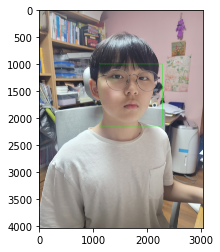

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 4, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림

    img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# boundind box가 얼굴과 비교하여 치우쳐짐. 

- 랜드마크 모델 다운로드  
    $ wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2    
    $ mv shape_predictor_68_face_landmarks.dat.bz2 ~/aiffel/camera_sticker/models    </br>
    $ cd ~/aiffel/camera_sticker && bzip2 -d ./models/shape_predictor_68_face_landmarks.dat.bz2

In [ ]:
# 랜드마크 68개 찍이는 모델.
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")

🌫🛸


In [ ]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성    

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


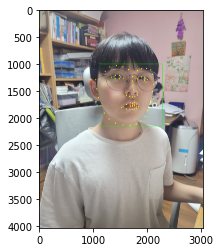

In [ ]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

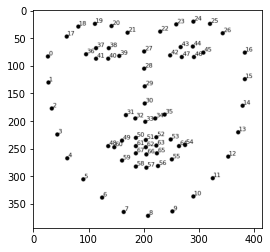

In [ ]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/E-8-8.png' # 본인 이미지가 있는 경로를 가지고 온다.
landmark = cv2.imread(landmark_path)    # OpenCV로 이미지를 불러옵니다

plt.imshow(landmark) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

In [ ]:
# zip() : 두 그룹의 데이터를 서로 엮어주는 파이썬의 내장 함수
# dlib_rects와 list_landmarks 데이터를 엮어 주었음
# dlib_rects : 얼굴 영역을 저장하고 있는 값
# 코 끝을 중심으로 수염을 붙여주려 함.

for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(1721, 1608)
(x,y) : (1721,1608)
(w,h) : (1151,1151)


(1151, 1151, 3)


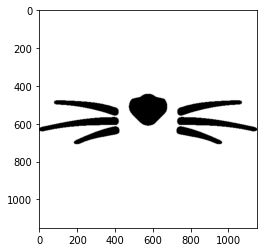

In [ ]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 수염 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 스티커 이미지의 차원 확인
plt.imshow(img_sticker)
# print(img_sticker)  # 수염의 배경색이 255인 것을 확인할 수 있음. 

In [ ]:
# 이미지의 기준점은 왼쪽 위 꼭지점.
refined_x = x - w // 2 # 코 중심, x에서 스티커 가로 길이 보정
refined_y = y - w // 2 # 코 중심, y값 그대로...

# 즉, refined_x, refined_y값에서 스티커이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') 
# 수염 스티커는 얼굴 중앙에 놓을 거여서 좌표가 음수값이 나오지 않았지만 아래 코드는 참고로..

(x,y) : (1146,1033)


In [ ]:
# 스티커 이미지가 이미지 밖에서 시작하지 않도록 조정이 필요함
# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# 현재 상황에서는 -y 크기만큼 스티커를 crop 하고, top 의 x좌표와 y 좌표를 각각의 경우에 맞춰 원본 이미지의 경계 값으로 수정하면 아래와 같은 형식으로 나옵니다.
# 음수값 만큼 왕관 이미지(혹은 추후 적용할 스티커 이미지)를 자른다.

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (1146,1033)


In [ ]:
# sticker_area는 원본이미지에서 스티커를 적용할 위치를 crop한 이미지 입니다.

# 좌표 순서가 y,x임에 유의한다. (y,x,rgb channel)
# img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

# 왕관 이미지에서 사용할 부분은 0이 아닌 색이 있는 부분을 사용합니다.
# png 스티커 이미지의 바탕이 0인 것과 255인 것이 있어 확인해야 함. 

# 현재 왕관 이미지에서는 왕관과 받침대 밑의 ------ 부분이 됨
# 그렇기 때문에 0인 부분(이미지가 없는 부분)은 제외하고 적용
# sticker_area는 원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지입니다.
# 즉, 왕관 이미지에서 왕관 이미지가 없는 부분(왕관과 받침대 밑의 ------ 부분)은 원본 이미지에서 미리 잘라놓은 sticker_area(스티커 적용할 부분 만큼 원본 이미지에서 자른 이미지)를 적용하고,
# 나머지 부분은 스티커로 채워주면 됨

# np.where는 조건에 해당하는 인덱스만 찾아서 값을 적용하는 방법이다.
# 아래 코드에서는 img_sticker가 0 또는 255일 경우(왕관 이미지에서 왕관 부분 제외한 나머지 이미지)에는 sticker_area(원본 이미지에서 스티커를 적용할 위치를 미리 잘라낸 이미지)를 적용하고,
# 나머지 부분은 img_sticker(왕관 이미지)를 적용한다.

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


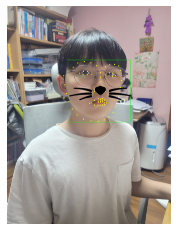

In [ ]:
# 스티커 이미지를 적용한 이미지를 보여준다.
# bounding box와 landmark를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

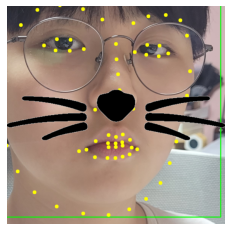

In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0],refined_x:refined_x+img_sticker.shape[1]]
plt.imshow(cv2.cvtColor(sticker_area, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

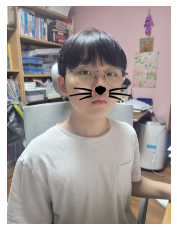

In [ ]:
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr_original = img_bgr.copy() # copy original image for transparent stiker

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

# https://jimmy-ai.tistory.com/46
# https://numpy.org/doc/stable/reference/generated/numpy.where.html

## Control Transparency
- cv2.addWeighted를 적용하기 위해서는 합치는 두 이미지들의 크기가 같아야 한다고..
- 스티커 이미지를 배경만 어떻게 늘리나 고민했음. 그러나
- 수염 붙인 사진과 원본 사진을 합치기로..

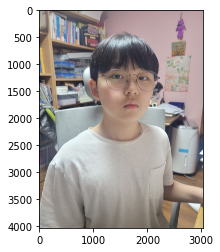

In [ ]:
plt.imshow(cv2.cvtColor(img_bgr_original, cv2.COLOR_BGR2RGB))

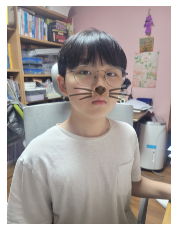

In [ ]:
img_combined = cv2.addWeighted(img_bgr,0.5,img_bgr_original, 0.5,0) # img_bgr, img_bgr_original
plt.imshow(cv2.cvtColor(img_combined, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# for Rotated Face

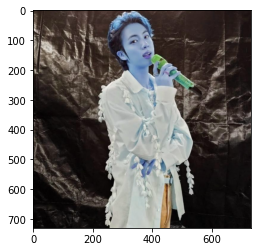

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/진.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show =      img_bgr.copy()      # 출력용 이미지를 따로 보관합니다|
plt.imshow(img_bgr) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

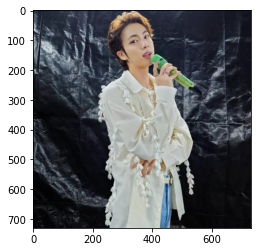

In [ ]:
# 이미지 실제 출력하기 위해 이미지를 올려
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb) # 이미지 실제 출력하기 위해 이미지를 올려줌 (원하는 사이즈의 픽셀을 원하는 색으로 채워서 만든 그림이라고 합니다.)
plt.show() # 이미지 실제 출력

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환
print("🌫🛸")

🌫🛸


In [ ]:
dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)
print("🌫🛸")

🌫🛸


rectangles[[(318, 68) (426, 175)]]


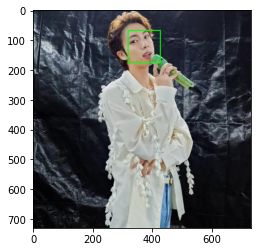

In [ ]:
# 찾은 얼굴 영역 박스 리스트
# 여러 얼굴이 있을 수 있습니다
print(dlib_rects)   

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [ ]:
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    # 저장한 landmark 모델의 주소를 model_path 변수에 저장
landmark_predictor = dlib.shape_predictor(model_path)
    # dlib 라이브러리의 shape_predictor 함수를 이용하여 모델을 불러옴
    # landmark_predictor는 RGB이미지와 dlib.rectangle를 입력 받고 dlib.full_object_detection를 반환
    # dlib.rectangle: 내부를 예측하는 박스
    # dlib.full_object_detection: 각 구성 요소의 위치와, 이미지 상의 객체의 위치를 나타냄
print("🌫🛸")



🌫🛸


In [ ]:
list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성   

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))
    # 얼굴이 n개인 경우 list_landmarks는 n개의 원소를 갖고
    # 각 원소는 68개의 랜드마크 위치가 나열된 list 
    # list_landmarks의 원소가 1개이므로 list_landmarks[1]을 호출하면 IndexError가 발생

68


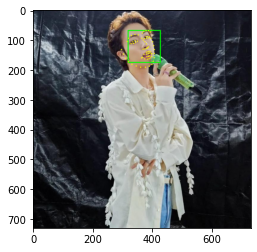

In [ ]:
# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## Measure Angle of Roatated face
- 얼굴 중앙의 직선인 코 위의 점 27~30 선이 얼마나 회전 되어 있는지 확인

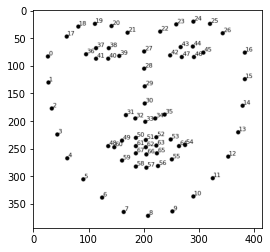

In [ ]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/E-8-8.png' # 본인 이미지가 있는 경로를 가지고 온다.
landmark = cv2.imread(landmark_path)    # OpenCV로 이미지를 불러옵니다
plt.imshow(landmark) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

In [ ]:
# get a angle of face
import math

def coordinate(no):
    for landmark in list_landmarks: # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
#         print (landmark[no]) # 코의 index는 30 입니다
        x1 = landmark[no][0] # 이미지에서 코 부위의 x값
        y1 = landmark[no][1] 
        print(x1, y1)
    return x1, y1

def angle(x1, y1, x2, y2):
    radian = math.atan((x1-x2)/(y1-y2))
    degree = math.degrees(radian)
    print(degree)
    return degree

# https://ko.from-locals.com/python-math-sin-cos-tan/
# https://docs.python.org/3/library/math.html#trigonometric-functions

In [ ]:
x1, y1 = coordinate(30)
x2, y2 = coordinate(27)

degree = angle(x1, y1, x2, y2)

# 회전 각도 얻음

379 113
364 94
38.29016319224307


## Rotate Sticker

In [ ]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(w,h) : ({w},{h})')

(w,h) : (109,109)


(109, 109, 3)


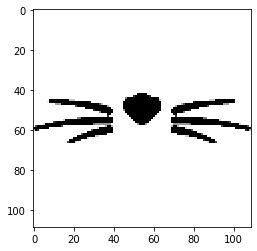

In [ ]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(img_sticker)
# print(img_sticker)

In [ ]:
def im_rotate(img, degree):
    h, w = img.shape[:-1] # 이미지 크기
#     crossLine = int(((w * h + h * w) ** 0.5)) # 어디에 사용?
    centerRotatePT = int(w / 2), int(h / 2) 
    new_h, new_w = h, w  #변환하는 이미지의 크기 설정하려고
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1)
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h), borderValue=(255,255,255))
    return result

# https://deep-learning-study.tistory.com/175
# https://deep-learning-study.tistory.com/199

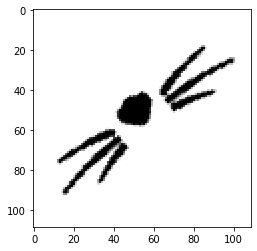

In [ ]:
img_sticker = im_rotate(img_sticker,degree)
plt.imshow(img_sticker)

In [ ]:
# 스티커 붙일 곳 정하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w, h = img_sticker.shape[:-1] # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(380, 128)
(x,y) : (380,128)
(w,h) : (109,109)


In [ ]:
# 이미지의 기준점은 왼쪽 위 꼭지점.
refined_x = x - w // 2 # 코 중심, x에서 스티커 가로 길이 보정
refined_y = y - w // 2  # 코 중심, y값 그대로...

# 즉, refined_x, refined_y값에서 스티커이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') 
# 수염 스티커는 얼굴 중앙에 놓을 거여서 좌표가 음수값이 나오지 않았지만 아래 코드는 참고로..

(x,y) : (326,74)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (326,74)


In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
print("슝~")

슝~


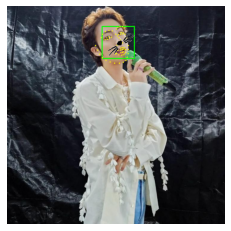

In [ ]:
# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


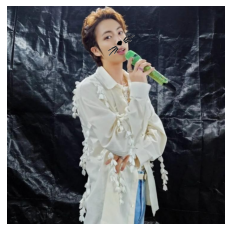

In [ ]:
# img_bgr은 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr_original = img_bgr.copy() # copy original image for transparent stiker

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()



# for Rotated Face & Side Camera Angle

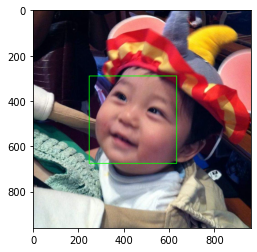

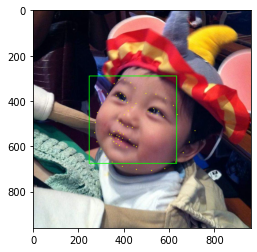

In [ ]:
# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/17.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show = img_bgr.copy()      # 출력용 이미지를 따로 보관합니다|
# 이미지 실제 출력하기 위해 이미지를 올려
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 저장한 landmark 모델의 주소를 model_path 변수에 저장
model_path = os.getenv('HOME')+'/aiffel/camera_sticker/models/shape_predictor_68_face_landmarks.dat'
    
landmark_predictor = dlib.shape_predictor(model_path)

list_landmarks = []
    # 랜드마크의 위치를 저장할 list 생성   

# 얼굴 영역 박스 마다 face landmark를 찾아냅니다
# face landmark 좌표를 저장해둡니다
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_rgb, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

## Measure Angle of Roatated face
- 얼굴 중앙의 직선인 코 위의 점 27~30 선이 얼마나 회전 되어 있는지 확인

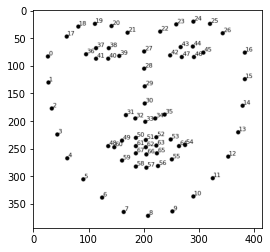

In [ ]:
landmark_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/E-8-8.png' # 본인 이미지가 있는 경로를 가지고 온다.
landmark = cv2.imread(landmark_path)    # OpenCV로 이미지를 불러옵니다
plt.imshow(landmark) # 이미지를 출력하기 위해 출력할 이미지를 올려준다. (실제 출력은 하지 않음)
plt.show() # 이미지를 출력해준다. (실제 출력)

In [ ]:
# get a angle of face
import math

def coordinate(no):
    for landmark in list_landmarks: # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
#         print (landmark[no]) # 코의 index는 30 입니다
        x1 = landmark[no][0] # 이미지에서 코 부위의 x값
        y1 = landmark[no][1] 
        print(x1, y1)
    return x1, y1

def angle(x1, y1, x2, y2):
    radian = math.atan((x1-x2)/(y1-y2))
    degree = math.degrees(radian)
    print(degree)
    return degree

# https://ko.from-locals.com/python-math-sin-cos-tan/
# https://docs.python.org/3/library/math.html#trigonometric-functions

x1, y1 = coordinate(30)
x2, y2 = coordinate(27)

degree = angle(x1, y1, x2, y2)

# 회전 각도 얻음

401 461
453 411
-46.12330271407543


## Rotate Sticker

In [ ]:
# 스티커 붙일 곳 정하기
for dlib_rect, landmark in zip(dlib_rects, list_landmarks): # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[33]) # 코의 index는 30 입니다
    x = landmark[33][0] # 이미지에서 코 부위의 x값
    y = landmark[33][1] # 이미지에서 코 부위의 y값 - 얼굴 영역의 세로를 차지하는 픽셀의 수//2 → (437, 182-(186+1//2))
    w = h = dlib_rect.width() # 얼굴 영역의 가로를 차지하는 픽셀의 수 (531-345+1) → max(x) - min(x) +1(픽셀의 수 이기 때문에 1을 더해줌 → 픽셀 수는 점 하나로도 1이 됨)
    print (f'(w,h) : ({w},{h})')
    print (f'(x,y) : ({x},{y})')


(395, 505)
(w,h) : (386,386)
(x,y) : (395,505)


(386, 386, 3)


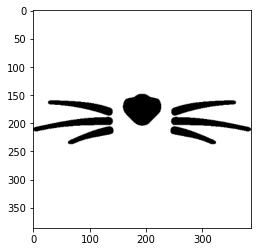

In [ ]:
sticker_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/cat-whiskers.png' # 왕관 이미지의 경로
img_sticker = cv2.imread(sticker_path) # 스티커 이미지를 불러옵니다 // cv2.imread(이미지 경로) → image객체 행렬을 반환
img_sticker = cv2.resize(img_sticker, (w,h)) # 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수(187) // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인
plt.imshow(img_sticker)
# print(img_sticker)

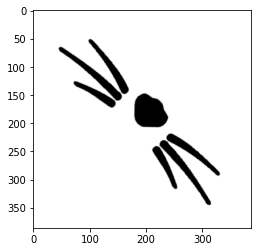

In [ ]:
def im_rotate(img, degree):
    h, w = img.shape[:-1] # 이미지 크기
#     crossLine = int(((w * h + h * w) ** 0.5)) # 어디에 사용?
    centerRotatePT = int(w / 2), int(h / 2) 
    new_h, new_w = h, w  #변환하는 이미지의 크기 설정하려고
    rotatefigure = cv2.getRotationMatrix2D(centerRotatePT, degree, 1)
    result = cv2.warpAffine(img, rotatefigure, (new_w, new_h), borderValue=(255,255,255))
    return result

# https://deep-learning-study.tistory.com/175
# https://deep-learning-study.tistory.com/199

img_sticker = im_rotate(img_sticker,degree)
plt.imshow(img_sticker)

In [ ]:
# 이미지의 기준점은 왼쪽 위 꼭지점.
refined_x = x - w // 2 # 코 중심, x에서 스티커 가로 길이 보정
refined_y = y - w // 2  # 코 중심, y값 그대로...

# 즉, refined_x, refined_y값에서 스티커이미지가 시작됨
print (f'(x,y) : ({refined_x},{refined_y})') 
# 수염 스티커는 얼굴 중앙에 놓을 거여서 좌표가 음수값이 나오지 않았지만 아래 코드는 참고로..

(x,y) : (202,312)


In [ ]:
if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0

if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :] # refined_y가 -98이므로, img_sticker[98: , :]가 된다. (187, 187, 3)에서 (89, 187, 3)이 됨 (187개 중에서 98개가 잘려나감)
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (202,312)


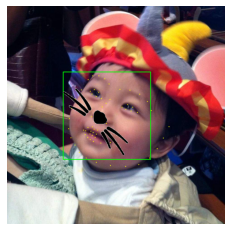

In [ ]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)

# 왕관 이미지를 적용한 이미지를 보여준다.
# 얼굴 영역(7-3)과 랜드마크(7-4)를 미리 적용해놓은 img_show에 왕관 이미지를 덧붙인 이미지가 나오게 된다.)
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


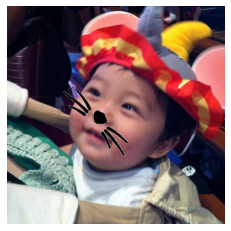

In [ ]:
# img_bgr은 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr_original = img_bgr.copy() # copy original image for transparent stiker

sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]

img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker==255,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.axis('off')
plt.show()

# 카메라 앵글이 측면을 찍는 사진이어서 얼굴의 중심의 코에 왜곡이 있었음.

# Lying position

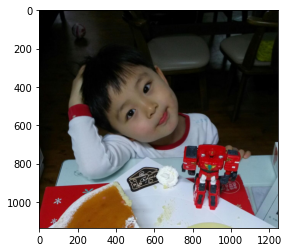

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/14.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show =      img_bgr.copy()      # 출력용 이미지를 따로 보관합니다|

# 이미지 실제 출력하기 위해 이미지를 올려
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 120, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

# 누운 자세는 face detection이 안됨

# Covered face

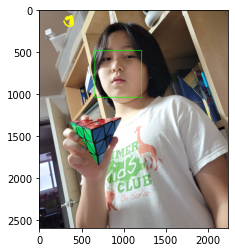

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/15.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show =      img_bgr.copy()      # 출력용 이미지를 따로 보관합니다|

# 이미지 실제 출력하기 위해 이미지를 올려
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 10, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

# 머리카락으로 가려진 얼굴은 face detection은 되지만 facelandmatk는 되지 않음.
# 카메라 앵글이 왜곡되어도 face detection이 되는 걸 보면 가려지지만 않았다면 landmark도 잘 수행했을 거라 예상

# a Long distance

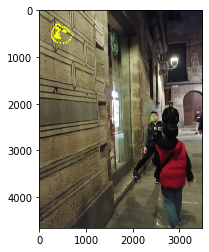

In [ ]:
my_image_path = os.getenv('HOME')+'/aiffel/camera_sticker/images/16.jpg' # 본인 이미지가 있는 경로를 가지고 온다.
img_bgr = cv2.imread(my_image_path)    # OpenCV로 이미지를 불러옵니다
img_show =      img_bgr.copy()      # 출력용 이미지를 따로 보관합니다|

# 이미지 실제 출력하기 위해 이미지를 올려
# plt.imshow 이전에 RGB 이미지로 바꾸는 것을 잊지마세요. 
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

# detector를 선언합니다
detector_hog = dlib.get_frontal_face_detector() # 기본 얼굴 감지기를 반환

dlib_rects = detector_hog(img_rgb, 1)   # (image, num of image pyramid)

for dlib_rect in dlib_rects: # 찾은 얼굴 영역의 좌표
    l = dlib_rect.left() # 왼쪽
    t = dlib_rect.top() # 위쪽
    r = dlib_rect.right() # 오른쪽
    b = dlib_rect.bottom() # 아래쪽
    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 5, lineType=cv2.LINE_AA) # 시작점의 좌표와 종료점 좌표로 직각 사각형을 그림
    
img_show_rgb =  cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)

# list_landmarks의 원소가 1개이므로 아래 반복문은 한번만 실행됨
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 20, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에
            # 크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
    # RGB 이미지로 전환
plt.imshow(img_show_rgb)
    # 이미지를 준비
plt.show()
    # 이미지를 출력

# face detection은 OK. Landmark는 NG
# 건물 벽에 bounding box도 없는데 왜 거기에 점이 찍혔을까?
# 작은 얼굴은 눈코입을 구별할 수 없나봄.

# Review
- Bounding Box를 그리고 FaceLandmark를 표시하여 얼굴의 원하는 위치에 스티커를 붙이는 프로젝트
- 머신러닝이나 딥러닝에 대한 것보다는 이미 구현된 모델을 활용하는 방법과 활용에 있어  
 여러 수학적인 접근, 유연한 적용을 필요로 하는 프로젝트였음. 
- 반투명한 스티커가 붙은 사진을 만들기 위해 스티커를 붙인 사진과 원본 사진을 합친 이미지를 사용하였음.  
 add.Weighted()는 합치는 두 사진의 사이즈가 같은 것이어야만 함.
- face detection의 범위를 넘어 다른 곳에 landmark가 된 마지막 2장을 얼굴 부분만 잘라 landmark를 실행시켜도 점이 찍히지 않는 것을 확인함.
- 여러 조건에서 FaceDetection은 잘 구현이 되었지만 landmark는 까다로운 최적의 조건이 있음. 
    - 적당한 크기 
    - 적당한 각도 범위 안의 회전
    - 감지할 얼굴이 가려지지 않고 온전한 형태